# Import Training Set and Validation Set

In [1]:
# Training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-08-23 14:11:56--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.179.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.4’

horse-or-human.zip. 100%[===================>] 142.65M   103MB/s    in 1.4s    

2024-08-23 14:11:57 (103 MB/s) - ‘horse-or-human.zip.4’ saved [149574867/149574867]

--2024-08-23 14:11:57--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.179.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [2]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()


In [3]:
import os

# Training horse pitcures directory
train_horse_dir = os.path.join('./horse-or-human/horses')

# Training human pictures directory
train_human_dir = os.path.join('./horse-or-human/humans')

# Validation horse pitcures directory
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Validation human pictures directory
validation_human_dir = os.path.join('./validation-horse-or-human/humans')


# Look into training files/images

In [4]:
# Number of images for each train directory
print('Total training horse pitcures:', len(os.listdir(train_horse_dir)))
print('Total training human pitcures:', len(os.listdir(train_human_dir)))

print('Total validation horse pitcures:', len(os.listdir(validation_horse_dir)))
print('Total validation human pitcures:', len(os.listdir(validation_human_dir)))

Total training horse pitcures: 500
Total training human pitcures: 527
Total validation horse pitcures: 128
Total validation human pitcures: 128


In [5]:
# Check files names training set images and see 10 examples

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

# Check files names of validation set images and see 10 examples
validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])


['horse32-5.png', 'horse42-3.png', 'horse07-6.png', 'horse06-1.png', 'horse41-2.png', 'horse28-0.png', 'horse03-1.png', 'horse09-6.png', 'horse15-5.png', 'horse19-9.png']
['human15-12.png', 'human10-07.png', 'human16-03.png', 'human16-23.png', 'human05-01.png', 'human02-00.png', 'human15-16.png', 'human05-28.png', 'human07-08.png', 'human05-11.png']
['horse5-458.png', 'horse1-224.png', 'horse5-589.png', 'horse4-389.png', 'horse3-498.png', 'horse2-254.png', 'horse1-384.png', 'horse6-089.png', 'horse5-303.png', 'horse2-011.png']
['valhuman02-06.png', 'valhuman04-18.png', 'valhuman03-21.png', 'valhuman02-05.png', 'valhuman01-19.png', 'valhuman05-27.png', 'valhuman02-15.png', 'valhuman01-01.png', 'valhuman01-08.png', 'valhuman01-24.png']


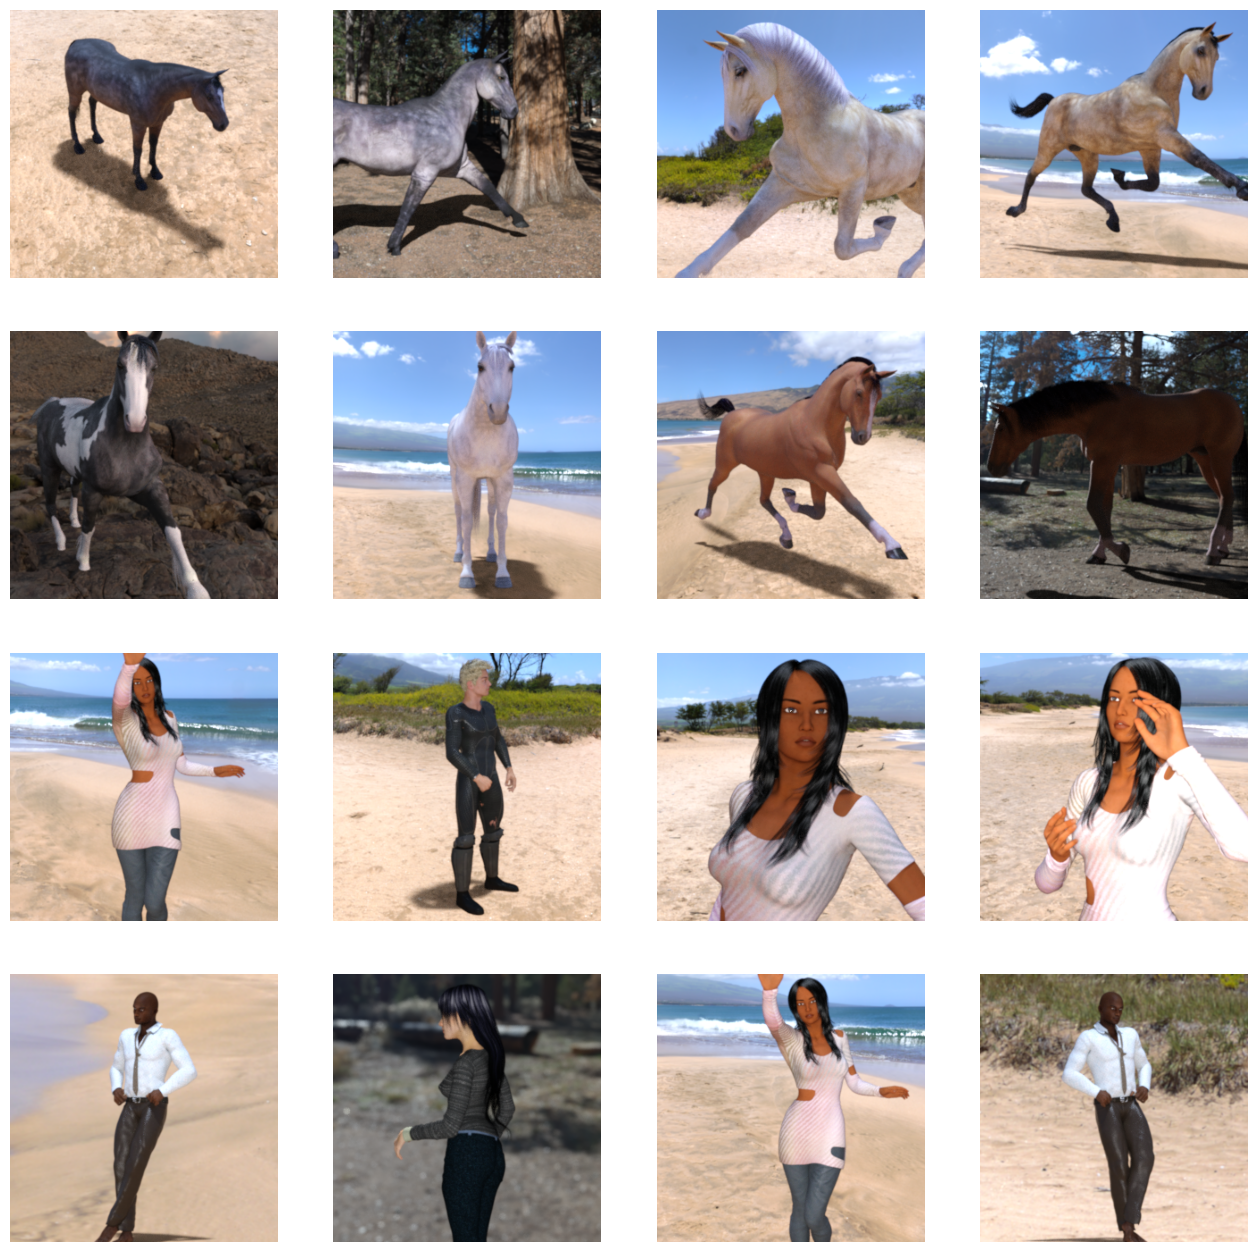

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  # Don't show axes (or gridlines)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Model Building

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
  Conv2D(16, (3,3), activation= 'relu', input_shape= (300,300,3)),
  MaxPooling2D(2,2),
  Conv2D(32, (3,3), activation= 'relu'),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation= 'relu'),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation= 'relu'),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation= 'relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(512, activation = 'relu'),
  # For binary classification I use 1 noran in output layer
  # I use sigmoid activation function because I vat to get result between 0-1
  Dense(1, activation= "sigmoid")
  ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Normalizing and transmit data callers to the model

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# FOR TRAINING
# Create a train generator object that rescales 1/255 -> pixel value range of images between 0 (black) - 1 (white)
train_datagen = ImageDataGenerator(rescale= 1./255)

# Flow training images in 128 batch using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',
        target_size = (300,300),
        batch_size = 32,
        class_mode = "binary"
)

# FOR VALIDATION
# Create a validation generator object that rescale 1/255
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Flow validation images in 32 batch using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',
        target_size = (300,300),
        batch_size = 32,
        class_mode = "binary"
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**🔸 Output:**
- Found 1027 images belonging to 2 classes.
- Found 256 images belonging to 2 classes.

# Train Data

In [12]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    epochs=15,
                    verbose = 1,
                    validation_data = validation_generator,
                    validation_steps = 8 )

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.4488 - loss: 0.7098 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5208 - loss: 0.6974
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5849 - loss: 0.6870 - val_accuracy: 0.5000 - val_loss: 0.6371
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5962 - loss: 0.7498
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5312 - loss: 0.6093 - val_accuracy: 0.5547 - val_loss: 0.6848
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7423 - loss: 0.5579
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8461 - loss: 0.3358 - val_accuracy: 0.8359 - val_loss: 0.5641
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9240 - loss: 0.2138
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8126 - loss: 0.4740 - val_accuracy: 0.8711 - val_loss: 0.7686
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.0753
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.8847 - loss: 0.2847 - val_accuracy: 0.8281 - val_loss: 0.6848
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 

# Prediction
- Upload file/files and test model
- There are 2 code blocks for 2 different browser: Google and Safari. Run juct one of code blocks according to browser you use.

In [ ]:
# FOR GOOGLE
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [ ]:
# FOR SAFARI
"""
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
  print()
# predicting images
  path = '/tmp/images/' + i
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(i + " is a human")
  else:
    print(i + " is a horse")
    """